In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 100
plt.style.use('ggplot')

In [2]:
def getDataOld(filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_prcons', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)
        
    method_map = {
        'one_cut_one_quant': '1_dtable',
        'one_cut_many_quants': 'many_dtable',
        'many_cuts_one_quant_1': '1_maxsat',
        'many_cuts_one_quant_2': '1_1_maxsat',
    }
    data['method'] = data['method'].astype(str).map(method_map)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

def getData(filename):
    data = pd.read_json(filename)
    
    # Adding a column for the database
    def getDB (s):
        if s.endswith(')'):
            return 0
        elif 'testing/TSTP/prover9' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        elif 'testing/TSTP/leanCoP' in s:
            return 3
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "results.json"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
data_other_exp[['method', 'file', 'status']]

,method,file,status
60,1_dtable,testing/TSTP/prover9/LCL/LCL517+1/Prover9---11...,cutintro_other_exception
61,1_1_maxsat,SquareDiagonalExampleProof(82),cutintro_other_exception
88,many_dtable,FactorialFunctionEqualityExampleProof2(61),cutintro_other_exception
96,2_2_maxsat,testing/TSTP/prover9/LCL/LCL097-1/Prover9---11...,cutintro_other_exception
114,1_1_maxsat,testing/TSTP/prover9/LCL/LCL500+1/Prover9---11...,cutintro_other_exception
132,2_maxsat,FactorialFunctionEqualityExampleProof2(61),cutintro_other_exception
233,many_dtable,testing/TSTP/leanCoP/NUM/NUM489+3/leanCoP---2....,cutintro_other_exception
248,2_maxsat,testing/TSTP/leanCoP/SWW/SWW473+5/leanCoP---2....,cutintro_other_exception
264,2_2_maxsat,testing/TSTP/prover9/LCL/LCL401-1/Prover9---11...,cutintro_other_exception
272,1_1_maxsat,testing/TSTP/prover9/LCL/LCL047-1/Prover9---11...,cutintro_other_exception


In [5]:
# Test that fail for 1_dtable and are ok in 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat == 'ok') & (merged.status_dtable != 'ok')][['file', 'status_dtable']]

,file,status_dtable
129,LinearExampleProof(26),cutintro_timeout
173,SquareEdgesExampleProof(13),cutintro_timeout
242,SumOfOnesFExampleProof(17),cutintro_timeout
259,SumOfOnesF2ExampleProof(6),cutintro_timeout
295,LinearEqExampleProof(23),cutintro_timeout
454,LinearEqExampleProof(16),cutintro_timeout
455,LinearExampleProof(41),cutintro_timeout
481,FactorialFunctionEqualityExampleProof2(23),cutintro_timeout
485,UniformAssociativity3ExampleProof(15),cutintro_timeout
494,testing/TSTP/prover9/LCL/LCL203-3/Prover9---11...,cutintro_timeout


In [6]:
# Test that are ok in 1_dtable and fail for 1_maxsat

merged = pd.merge(
    data[data.method == '1_dtable'],
    data[data.method == '1_maxsat'],
    on=['file'], suffixes=('_dtable', '_maxsat'))

merged[(merged.status_maxsat != 'ok') & (merged.status_dtable == 'ok')][['file', 'status_maxsat']]

,file,status_maxsat
16,testing/TSTP/prover9/RNG/RNG004-1/Prover9---11...,cutintro_timeout
32,testing/TSTP/prover9/HEN/HEN003-3/Prover9---11...,cutintro_uncompressible
52,testing/TSTP/prover9/HEN/HEN003-4/Prover9---11...,cutintro_uncompressible
175,testing/TSTP/prover9/MGT/MGT050-1/Prover9---11...,cutintro_uncompressible
262,testing/TSTP/prover9/GEO/GEO009-3/Prover9---11...,cutintro_timeout
290,testing/TSTP/prover9/SYN/SYN604-1/Prover9---11...,cutintro_uncompressible
322,testing/TSTP/prover9/REL/REL009+1/Prover9---11...,cutintro_uncompressible
411,testing/TSTP/prover9/GEO/GEO204+1/Prover9---11...,cutintro_uncompressible
479,testing/TSTP/prover9/TOP/TOP035+1/Prover9---11...,cutintro_uncompressible
547,testing/TSTP/prover9/HWV/HWV007-1/Prover9---11...,cutintro_timeout


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-03-15/CutIntroDataLog.txt"
previous_data = getDataOld(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'], suffixes=('_new','_old'))

regression = merged[(merged.status_old == 'ok') & (merged.status_new != 'ok')]

regression_delta = regression[(regression.method == '1_dtable') | (regression.method == 'many_dtable')]
regression_maxsat = regression[((regression.method == '1_maxsat') | (regression.method == '1_1_maxsat')) ]

regression[['method', 'file', 'status_old', 'status_new']]

,method,file,status_old,status_new
20,1_maxsat,testing/TSTP/prover9/SYN/SYN190-1/Prover9---11...,ok,cutintro_uncompressible
60,1_maxsat,testing/TSTP/prover9/LCL/LCL498+1/Prover9---11...,ok,cutintro_timeout
124,1_maxsat,testing/TSTP/prover9/MGT/MGT054+1/Prover9---11...,ok,cutintro_uncompressible
218,1_maxsat,testing/TSTP/prover9/SYN/SYN052-1/Prover9---11...,ok,cutintro_uncompressible
227,1_1_maxsat,testing/TSTP/prover9/GRP/GRP574-1/Prover9---11...,ok,cutintro_ehs_unprovable
230,1_maxsat,testing/TSTP/prover9/GRP/GRP561-1/Prover9---11...,ok,cutintro_timeout
247,1_1_maxsat,testing/TSTP/prover9/PLA/PLA002-1/Prover9---11...,ok,cutintro_uncompressible
295,1_dtable,testing/TSTP/prover9/LAT/LAT310+1/Prover9---11...,ok,cutintro_uncompressible
305,1_maxsat,testing/TSTP/prover9/GEO/GEO174+2/Prover9---11...,ok,cutintro_uncompressible
314,1_1_maxsat,testing/TSTP/prover9/SET/SET105-7/Prover9---11...,ok,cutintro_uncompressible


In [8]:
methods = sorted(set(data.method.dropna()))

dbs = {
    0: 'Proof examples',
    1: 'Prover9',
    2: 'VeriT',
    3: 'LeanCoP',
}

dbs = { i: dbs[i] for i in dbs.keys() if i in data.db.values }

In [9]:
print("=== Number of tests per database and method:\n")

for dbi, dbname in dbs.items():
    for method in methods:
        print("{0} - {1}: {2}".format(dbname, method,
                                     data[(data.method==method) & (data.db==dbi)].shape[0]))
    print()

=== Number of tests per database and method:

Proof examples - 1_1_maxsat: 1201
Proof examples - 1_dtable: 1199
Proof examples - 1_maxsat: 1198
Proof examples - 2_2_maxsat: 1198
Proof examples - 2_maxsat: 1202
Proof examples - many_dtable: 1199

Prover9 - 1_1_maxsat: 6328
Prover9 - 1_dtable: 6335
Prover9 - 1_maxsat: 6337
Prover9 - 2_2_maxsat: 6334
Prover9 - 2_maxsat: 6334
Prover9 - many_dtable: 6336

LeanCoP - 1_1_maxsat: 3036
LeanCoP - 1_dtable: 3038
LeanCoP - 1_maxsat: 3034
LeanCoP - 2_2_maxsat: 3041
LeanCoP - 2_maxsat: 3040
LeanCoP - many_dtable: 3040



In [10]:
states = set(data.status.values)
status_colors = {}
for s in data.status.values:
    if s == 'ok':
        c = 'green'
    elif s == 'cutintro_uncompressible':
        c = 'yellow'
    elif s.endswith('timeout'):
        c = plt.cm.Blues(hash(s)/2**65+0.5)
    elif s.endswith('exception'):
        c = plt.cm.Reds(hash(s)/2**65+0.5)
    else:
        c = plt.cm.Greys(hash(s)/2**65+0.5)
    status_colors[s] = c

def plot_status(d, legend=True, **kwargs):
    plt.axis('equal')
    d.plot(kind='pie', autopct='%1.1f%%',
                        colors=[status_colors[s] for s in d.index], **kwargs) \
        .set_ylabel('')
    if legend: plt.legend(d.index, loc='center left', bbox_to_anchor=(1, 0.5))

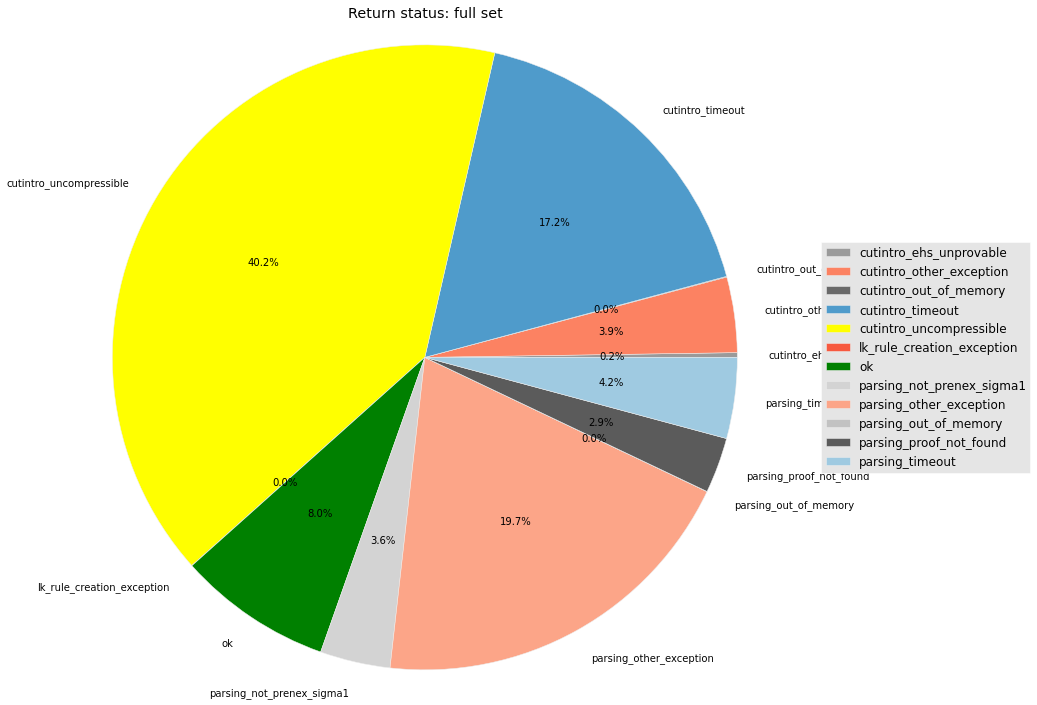

In [11]:
plot_status(data.groupby('status').size(), figsize=(14,12), title='Return status: full set')

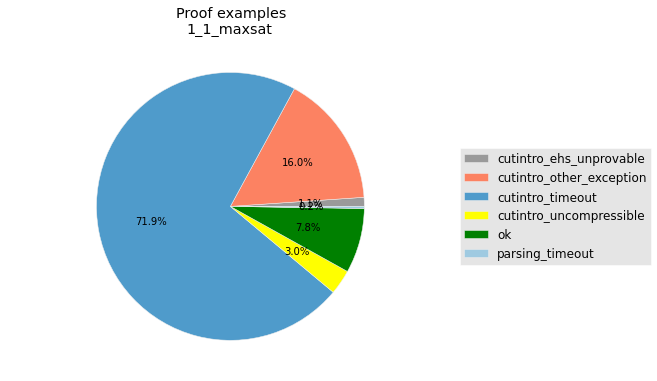

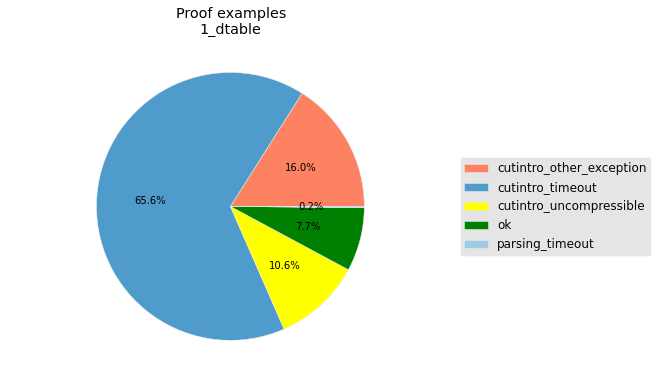

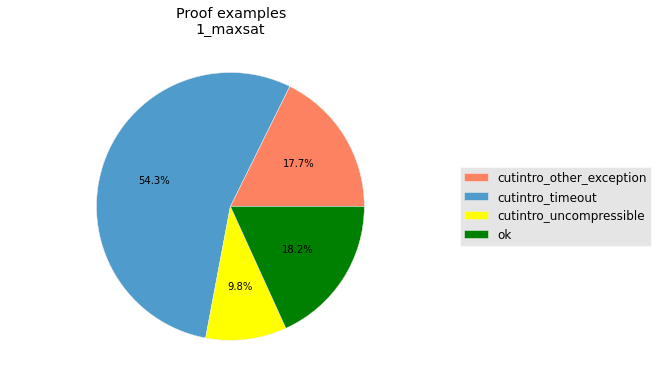

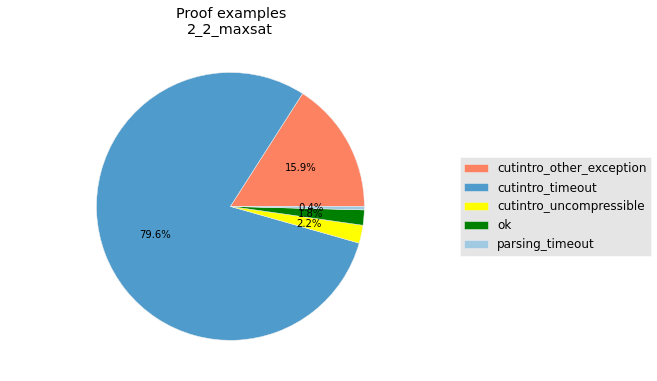

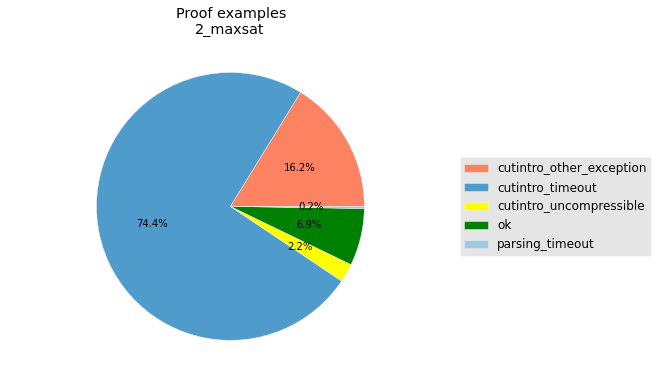

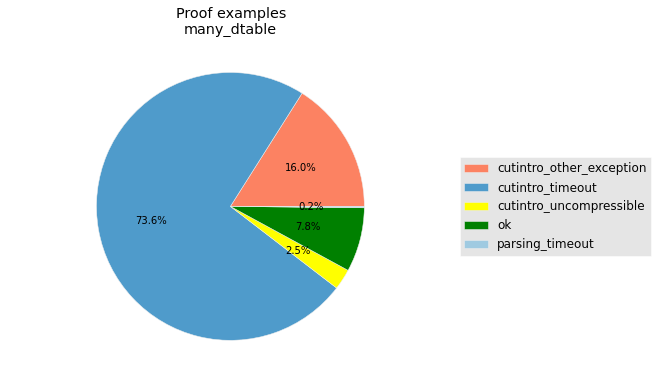

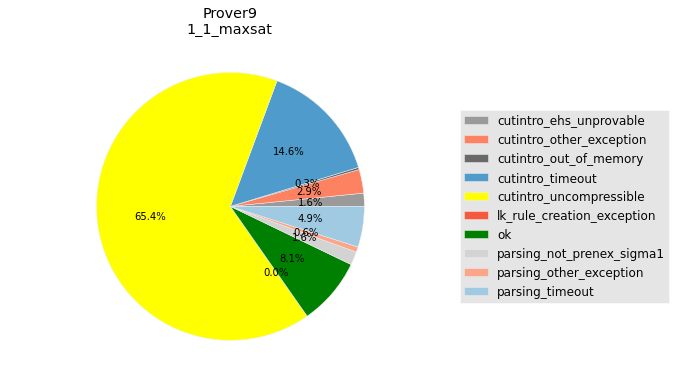

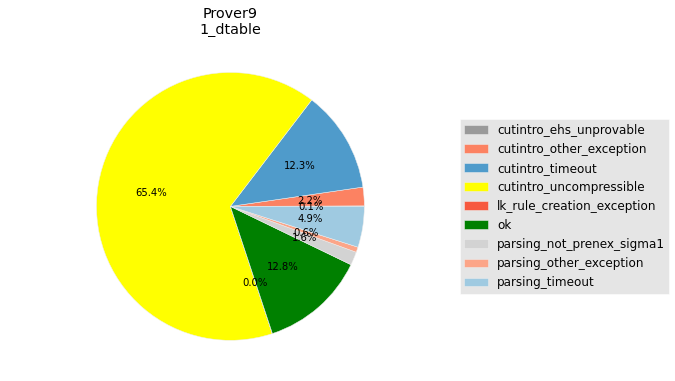

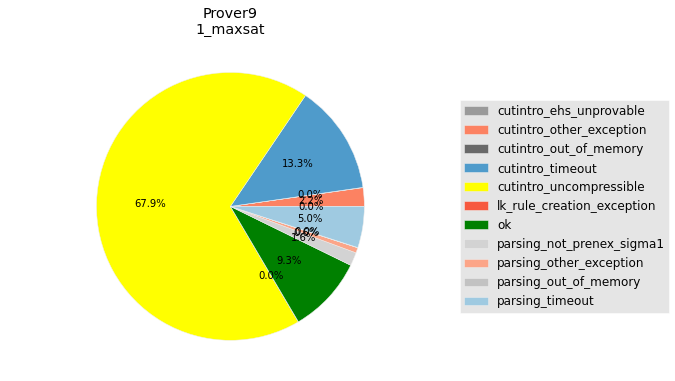

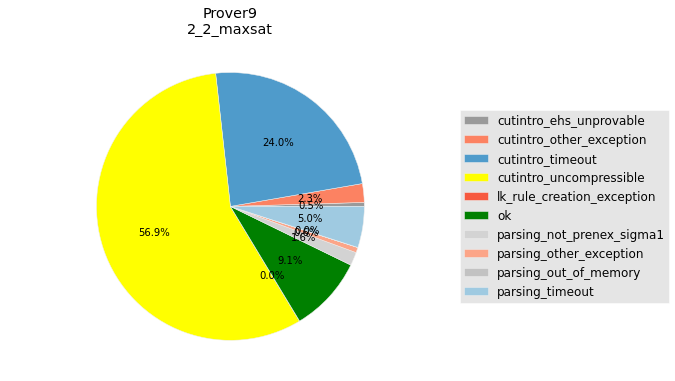

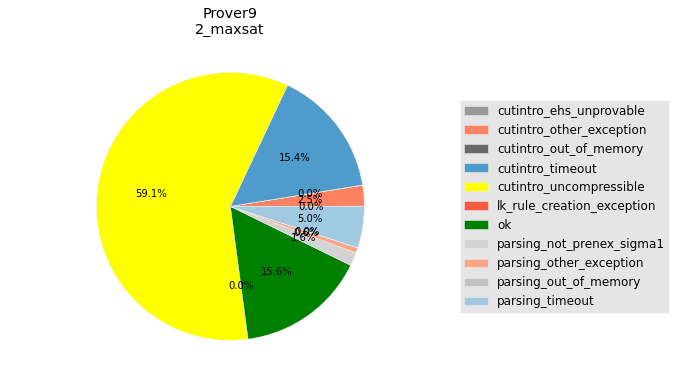

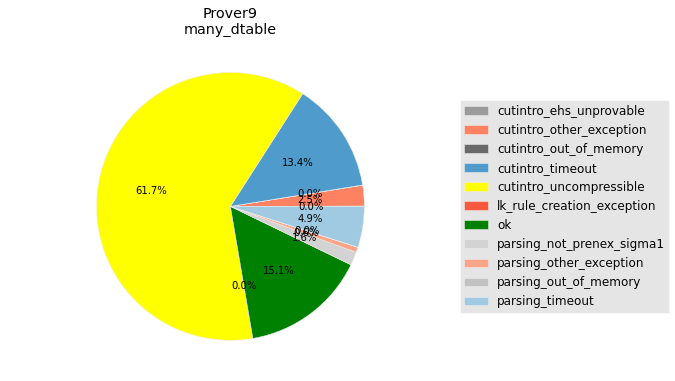

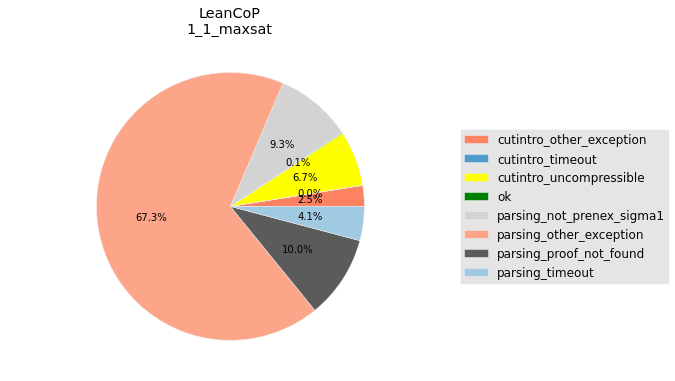

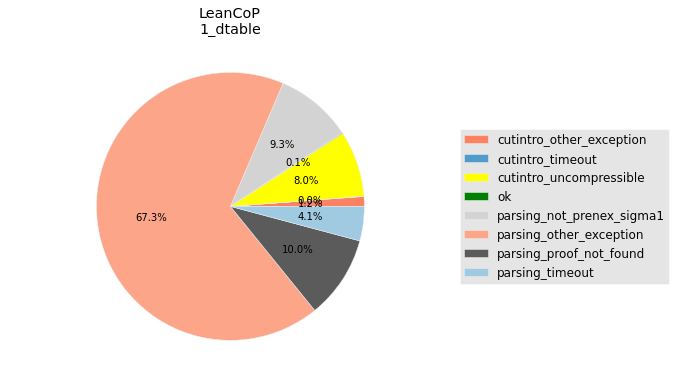

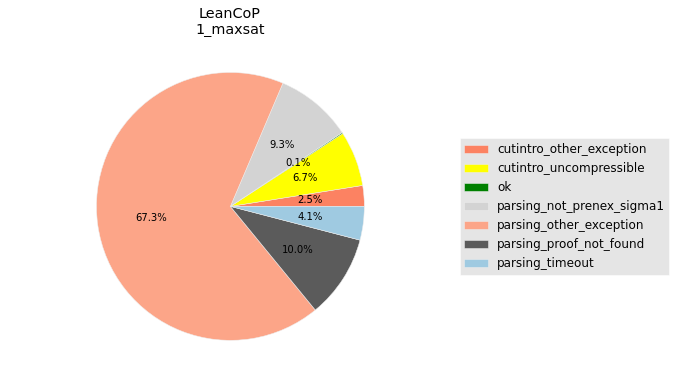

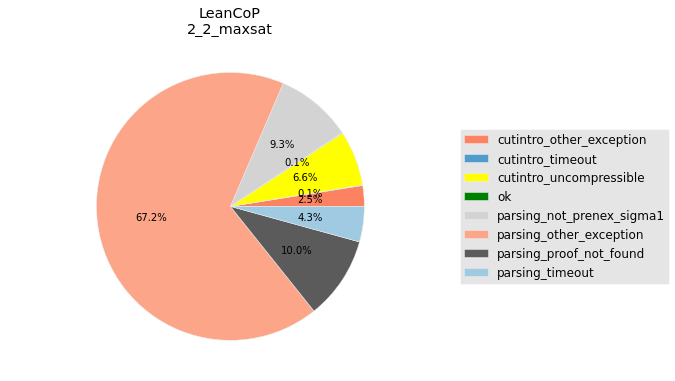

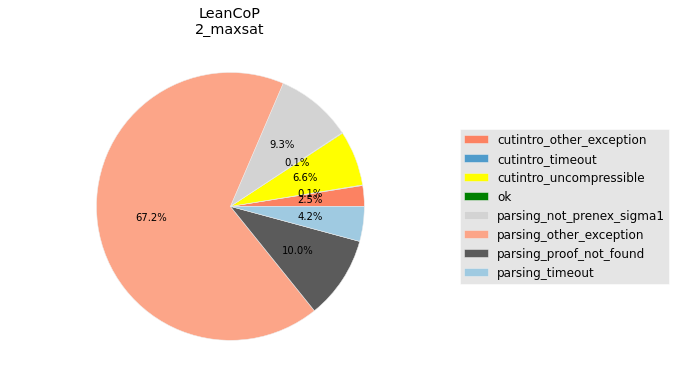

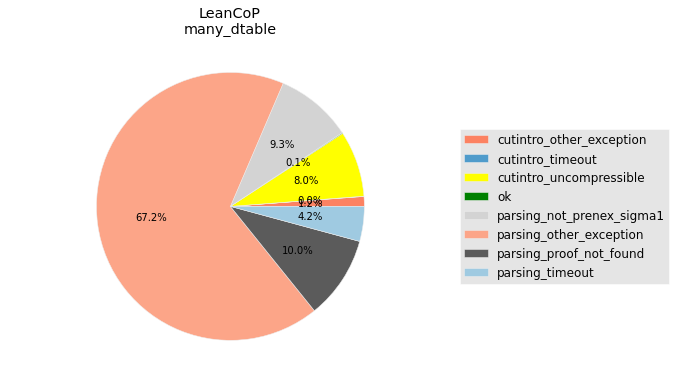

In [12]:
for dbi, db in dbs.items():
    for method in methods:
        subdata = data[(data.db==dbi) & (data.method==method)].groupby('status').size()
        plot_status(subdata, title='{0}\n{1}'.format(db,method), labels=None, figsize=(8,6))
        plt.show()

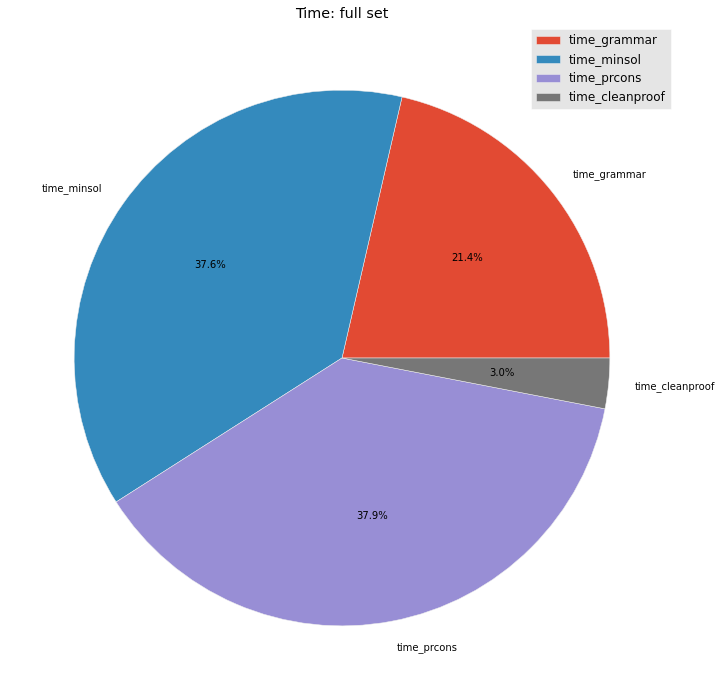

In [13]:
timecols = ['time_grammar', 'time_minsol', 'time_prcons', 'time_cleanproof']
plt.axis('equal')
data[timecols].mean().plot(kind='pie', figsize=(12,12), autopct='%1.1f%%',
                           title='Time: full set', legend=True).set_ylabel('')

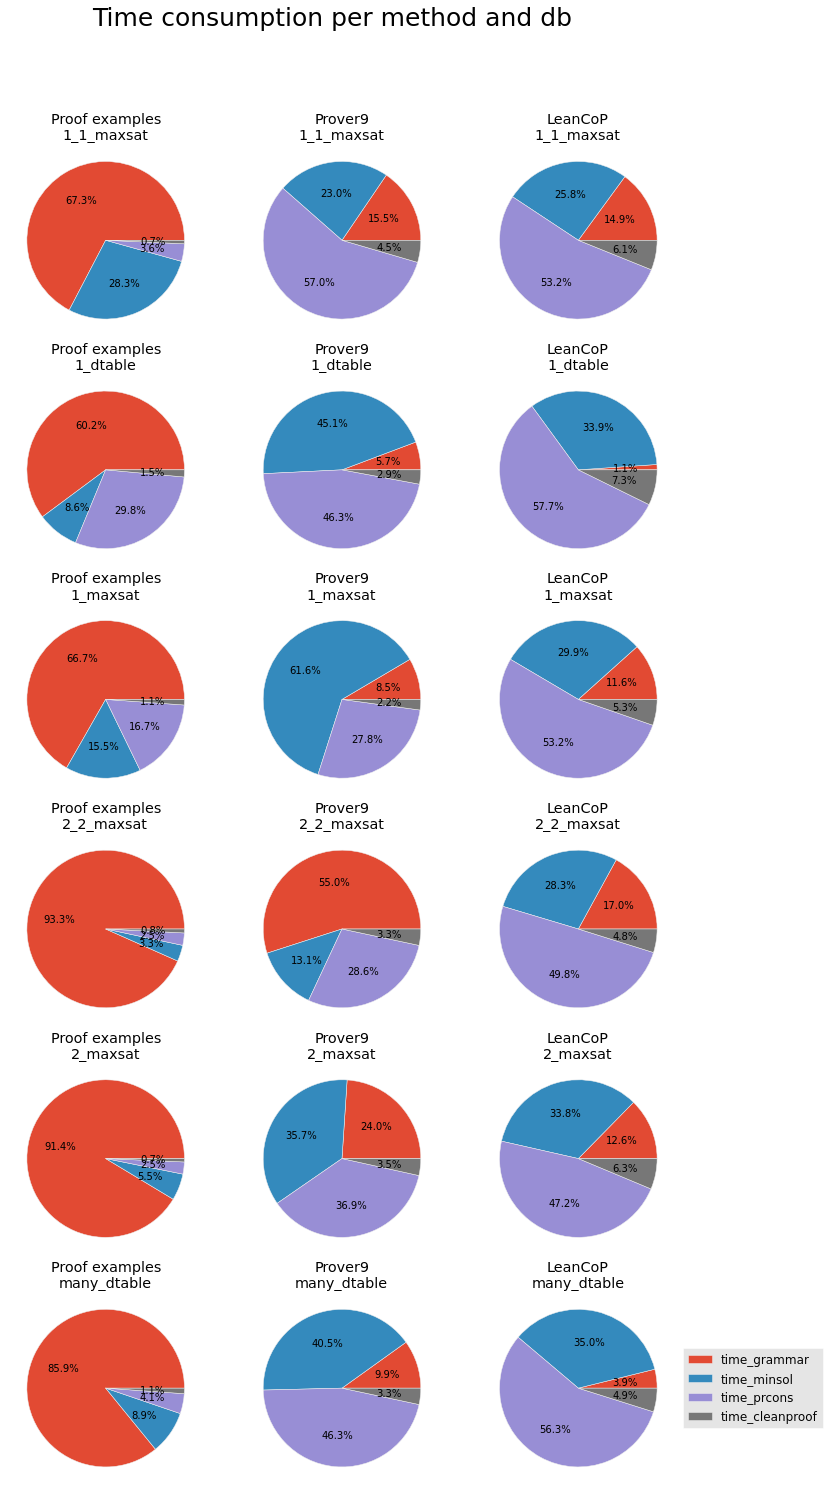

In [14]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        data[(data.db==dbi) & (data.method==method)][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method)).set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

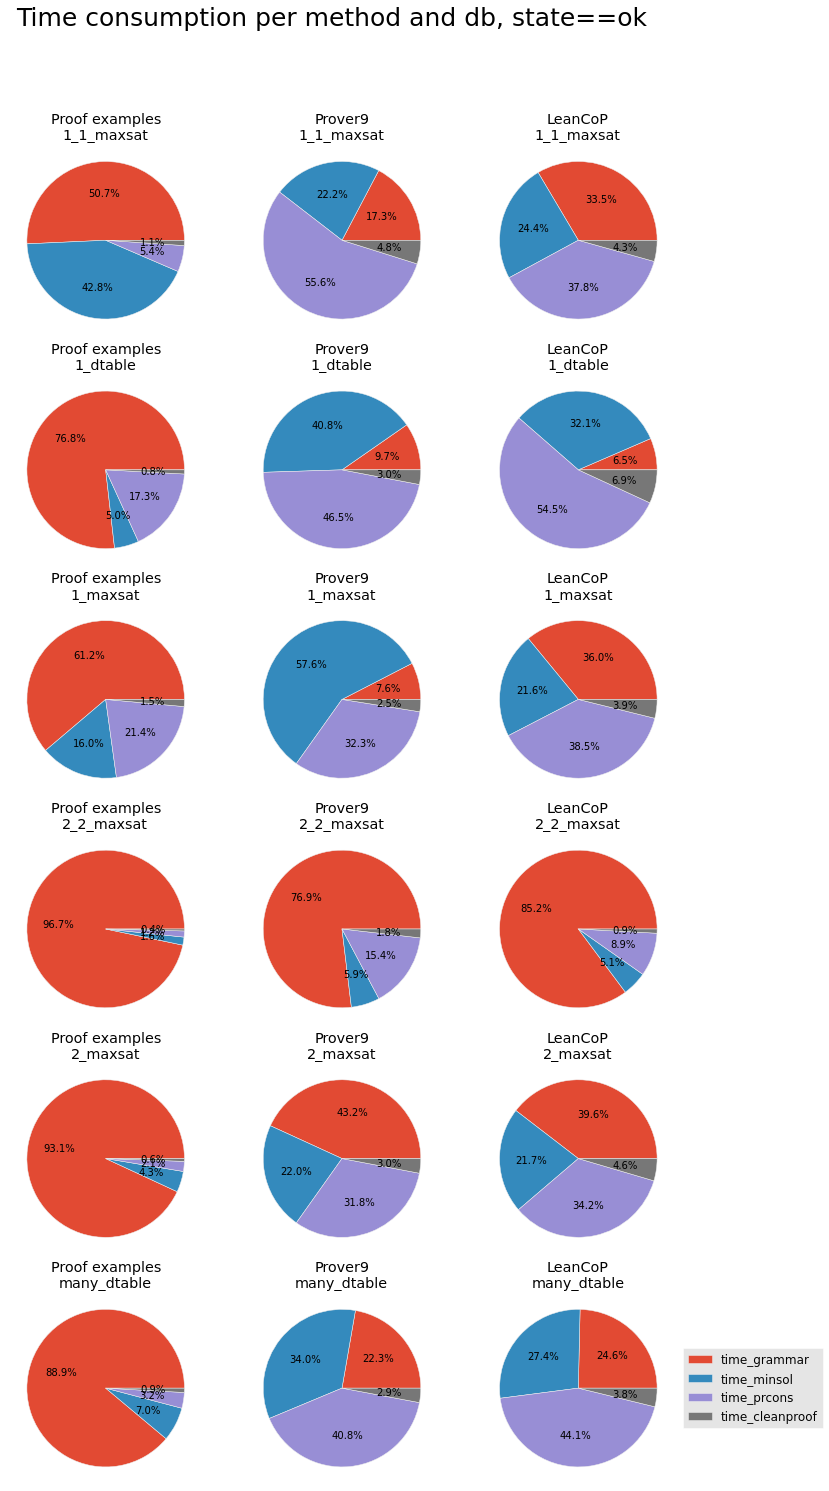

In [15]:
xsize, ysize = len(dbs.items()), len(methods)
plt.figure(1, figsize=(4*xsize,4*ysize))
plt.suptitle('Time consumption per method and db, state==ok', fontsize=25)
for i, method in enumerate(methods):
    for j, (dbi, db) in enumerate(dbs.items()):
        plt.subplot(ysize, xsize, i*xsize + j + 1)
        plt.axis('equal')
        ax = data[(data.db==dbi) & (data.method==method) & (data.status=='ok')][timecols].mean() \
            .plot(kind='pie', autopct='%1.1f%%', labels=None,
                  title='{0}\n{1}'.format(db,method))
        ax.set_ylabel('')
plt.legend(timecols, loc='center left', bbox_to_anchor=(1, 0.5))

In [16]:
data['status'].value_counts()

cutintro_uncompressible       25500
parsing_other_exception       12501
cutintro_timeout              10929
ok                             5059
parsing_timeout                2654
cutintro_other_exception       2472
parsing_not_prenex_sigma1      2304
parsing_proof_not_found        1824
cutintro_ehs_unprovable         153
cutintro_out_of_memory           23
lk_rule_creation_exception        6
parsing_out_of_memory             5
dtype: int64

In [17]:
# Different grammar sizes between different methods: one cut with one quantifier
data_dtable = data[(data.method == '1_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '1_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
1,testing/TSTP/prover9/RNG/RNG004-1/Prover9---11...,76,58
3,testing/TSTP/prover9/LDA/LDA002-1/Prover9---11...,26,24
13,testing/TSTP/prover9/LCL/LCL156-1/Prover9---11...,33,27
15,testing/TSTP/prover9/GRP/GRP528-1/Prover9---11...,57,46
17,testing/TSTP/prover9/GEO/GEO029-2/Prover9---11...,25,23
27,testing/TSTP/prover9/HEN/HEN011-2/Prover9---11...,34,33
28,testing/TSTP/prover9/GRP/GRP656+1/Prover9---11...,17,15
32,testing/TSTP/prover9/SET/SET887+1/Prover9---11...,31,30
33,testing/TSTP/prover9/GRP/GRP531-1/Prover9---11...,24,23
38,testing/TSTP/prover9/SWV/SWV537-1.004/Prover9-...,60,54


In [18]:
# Different grammar sizes between different methods: one cut with multiple quantifiers
data_dtable = data[(data.method == 'many_dtable') & data.grammar_size]
data_maxsat = data[(data.method == '2_maxsat') & data.grammar_size]

merged = pd.merge(data_dtable, data_maxsat, on=['file'], suffixes=('_dtable', '_maxsat'))
merged[merged.grammar_size_dtable != merged.grammar_size_maxsat] \
    [['file', 'grammar_size_dtable', 'grammar_size_maxsat']]

,file,grammar_size_dtable,grammar_size_maxsat
0,testing/TSTP/prover9/PRO/PRO016+4/Prover9---11...,30,29
1,testing/TSTP/prover9/KRS/KRS145+1/Prover9---11...,31,28
3,testing/TSTP/prover9/GRP/GRP130-3.003/Prover9-...,38,34
6,testing/TSTP/prover9/GRP/GRP702+1/Prover9---11...,12,11
7,testing/TSTP/prover9/REL/REL014+1/Prover9---11...,9,8
8,testing/TSTP/prover9/KLE/KLE026+1/Prover9---11...,20,18
9,testing/TSTP/prover9/HWV/HWV007-2/Prover9---11...,65,64
11,testing/TSTP/prover9/MGT/MGT005-1/Prover9---11...,32,31
13,testing/TSTP/prover9/SET/SET016-6/Prover9---11...,42,31
14,testing/TSTP/prover9/LCL/LCL322-3/Prover9---11...,24,20


In [19]:
# Better compression with 2x2 quantifiers than 1x2 quantifiers or 2x1 quantifiers
data_1x2 = data[(data.method == '2_maxsat') & data.grammar_size]
data_2x1 = data[(data.method == '1_1_maxsat') & data.grammar_size]
data_2x2 = data[(data.method == '2_2_maxsat') & data.grammar_size]

merged = data_1x2.merge(data_2x1, on='file', suffixes=('_1x2', '_2x1')) \
    .merge(data_2x2, on='file')
merged[(merged.grammar_size < merged.grammar_size_1x2) & (merged.grammar_size < merged.grammar_size_2x1)] \
    [['file', 'grammar_size', 'grammar_size_2x1', 'grammar_size_1x2']]

,file,grammar_size,grammar_size_2x1,grammar_size_1x2
8,testing/TSTP/prover9/GEO/GEO180+2/Prover9---11...,14,17,15
30,testing/TSTP/prover9/GEO/GEO181+1/Prover9---11...,14,16,15
31,testing/TSTP/prover9/GRP/GRP128-4.003/Prover9-...,18,20,20
46,testing/TSTP/prover9/GEO/GEO190+2/Prover9---11...,15,18,16
93,testing/TSTP/prover9/FLD/FLD057-3/Prover9---11...,27,31,29
126,testing/TSTP/prover9/RNG/RNG001-4/Prover9---11...,16,18,17
139,testing/TSTP/prover9/MSC/MSC008-1.002/Prover9-...,21,23,23
149,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,22,24,23
161,testing/TSTP/prover9/GEO/GEO198+1/Prover9---11...,15,19,17
187,testing/TSTP/prover9/RNG/RNG001-3/Prover9---11...,14,16,15


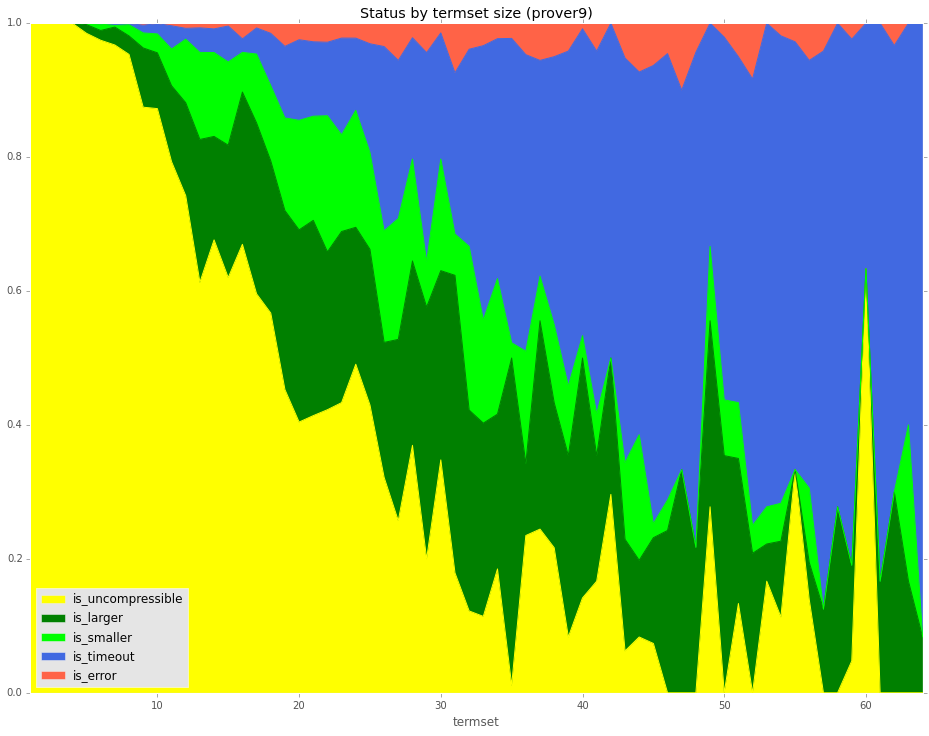

In [20]:
data['is_smaller'] = (data.status=='ok') & (data.ehs_resinf < data.resinf_input)
data['is_larger'] = (data.status=='ok') & (data.ehs_resinf >= data.resinf_input)
data['is_uncompressible'] = data.status.str.endswith('uncompressible')
data['is_timeout'] = data.status.str.endswith('timeout')
data['is_error'] = ~data.is_smaller & ~data.is_larger & ~data.is_uncompressible & ~data.is_timeout

data[(data.termset<65)&(data.db==1)].groupby('termset').mean() \
    [['is_uncompressible', 'is_larger', 'is_smaller', 'is_timeout', 'is_error']] \
    .plot(kind='area', figsize=(16,12), ylim=(0,1), title='Status by termset size (prover9)',
          color=['yellow', 'green', 'lime', 'royalblue', 'tomato'])

In [21]:
# Proofs with good compression of EHS/HS
data[data.ehs_resinf/data.hs_resinf < 0.1] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
6455,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,many_dtable,11,130,10
12986,testing/TSTP/prover9/GRP/GRP482-1/Prover9---11...,1_1_maxsat,14,177,31
19934,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_maxsat,11,130,10
24367,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_dtable,11,130,10
26285,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,2_2_maxsat,11,130,10
37691,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_1_maxsat,11,130,10
54466,testing/TSTP/prover9/GRP/GRP481-1/Prover9---11...,1_maxsat,11,130,10


In [22]:
# Proofs with good compression of EHS/input
data[data.ehs_resinf/data.resinf_input < 0.2] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
7615,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_dtable,14,14,76
16562,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_1_maxsat,14,14,76
20697,testing/TSTP/prover9/BOO/BOO018-4/Prover9---11...,1_1_maxsat,3,8,41
29050,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,1_maxsat,14,14,76
33232,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,many_dtable,12,12,61
39080,testing/TSTP/prover9/SWW/SWW474+1/Prover9---11...,many_dtable,14,14,76
50014,testing/TSTP/prover9/SEU/SEU154+1/Prover9---11...,1_dtable,12,12,61
53817,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,many_dtable,3,4,40
55979,testing/TSTP/prover9/NUM/NUM477+2/Prover9---11...,many_dtable,11,12,59


In [23]:
# Proofs with blowup
data[data.ehs_resinf > 5*data.hs_resinf] \
    [['file', 'method', 'ehs_resinf', 'hs_resinf', 'resinf_input']]

,file,method,ehs_resinf,hs_resinf,resinf_input
1428,SumOfOnesExampleProof(15),1_maxsat,385,45,NaN
1473,testing/TSTP/prover9/GRP/GRP598-1/Prover9---11...,1_1_maxsat,979,97,18
2936,testing/TSTP/prover9/BOO/BOO011-4/Prover9---11...,1_maxsat,23,4,40
3042,testing/TSTP/prover9/KLE/KLE139+2/Prover9---11...,1_1_maxsat,423,52,49
5261,testing/TSTP/prover9/ALG/ALG440-1/Prover9---11...,many_dtable,8069,85,59
10383,testing/TSTP/prover9/GRP/GRP372-1/Prover9---11...,1_1_maxsat,1246,221,91
21138,testing/TSTP/prover9/GRP/GRP267-1/Prover9---11...,1_1_maxsat,1004,158,58
24909,testing/TSTP/prover9/SWV/SWV558-1.004/Prover9-...,1_1_maxsat,614,81,88
25969,UniformAssociativity3ExampleProof(1),2_maxsat,46,5,NaN
26635,testing/TSTP/prover9/SWV/SWV592-1/Prover9---11...,1_1_maxsat,338,62,27


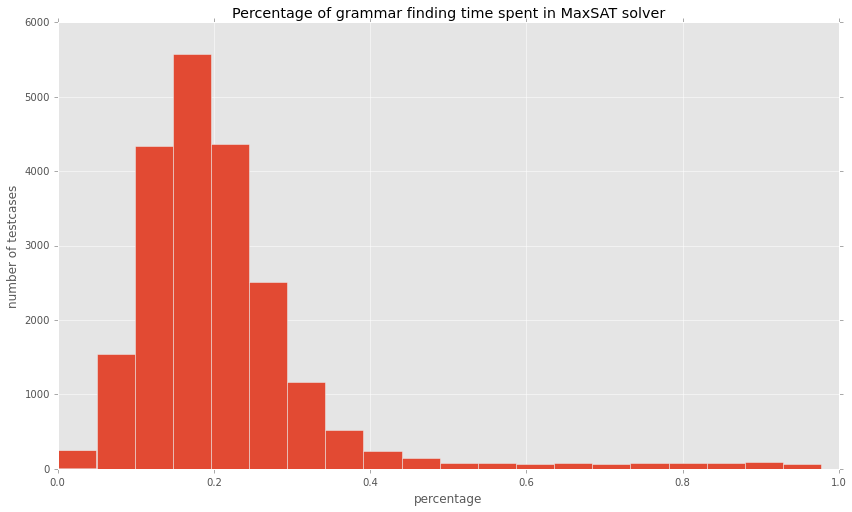

In [24]:
ax = (data.time_maxsat/data.time_grammar).dropna().plot(kind='hist', figsize=(14,8),
    title='Percentage of grammar finding time spent in MaxSAT solver', bins=20)
ax.set_xlabel('percentage')
ax.set_ylabel('number of testcases')